In [14]:
# Importing the EfficientNetB4 model from TensorFlow's applications module
from tensorflow.keras.applications import EfficientNetB4
import pandas as pd  # For working with data in tabular format
import numpy as np # For numerical operations
import cv2 # For computer vision tasks
import os # For file and directory operations
import sklearn #model evaluation
import random  # For generating random numbers
from PIL import Image  # For working with images
import matplotlib.pyplot as plt  # For plotting graphs and images
from pathlib import Path
import seaborn as sns
print('Success') # Printing a message to indicate success



Success


In [15]:
# Specify the folder path you want to list files and directories from
folder_path = "C:\\Users\\prera\\Desktop\\preml\\archive\\ISIC_2019_Training_Input"
# Define the paths to the directories on your local machine
benignkeratosis_directory = "C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\Training\\BenignKeratosis"
melanoma_directory = "C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\Training\\Melanoma"
basalcell_directory = "C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\Training\\BasalCellCarcinoma"
squamous_directory = "C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\Training\\Squamous"
# List the files and directories in each of the specified directories
benignimages=os.listdir(benignkeratosis_directory)
melanomaimages = os.listdir(melanoma_directory)
basalimages = os.listdir(basalcell_directory)
squamousimages = os.listdir(squamous_directory)
benign_count = len(benignimages)
melanoma_count = len(melanomaimages)
basal_count = len(basalimages)
squamous_count = len(squamousimages)
total_count=benign_count+melanoma_count+basal_count+squamous_count
print('The total no odf images:',total_count)


The total no odf images: 13792


In [16]:
# Path to the CSV file
csv_file_path = "C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\ISIC_2019_Training_GroundTruth.csv"

# Read the CSV file and rename the DataFrame as 'ground'
ground = pd.read_csv(csv_file_path)

# Display the content of the 'ground' DataFrame
print(ground)



              image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0      ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1      ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2      ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3      ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4      ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
...             ...  ...  ...  ...  ...  ...  ...   ...  ...  ...
25326  ISIC_0073247  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0
25327  ISIC_0073248  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0
25328  ISIC_0073249  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25329  ISIC_0073251  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25330  ISIC_0073254  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0

[25331 rows x 10 columns]


In [17]:
# Path to the CSV file
csv_file_path = "C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\ISIC_2019_Training_Metadata.csv"

# Read the CSV file
metadata = pd.read_csv(csv_file_path)

# Display the content of the CSV file
print(metadata)



              image  age_approx anatom_site_general    lesion_id     sex
0      ISIC_0000000        55.0      anterior torso          NaN  female
1      ISIC_0000001        30.0      anterior torso          NaN  female
2      ISIC_0000002        60.0     upper extremity          NaN  female
3      ISIC_0000003        30.0     upper extremity          NaN    male
4      ISIC_0000004        80.0     posterior torso          NaN    male
...             ...         ...                 ...          ...     ...
25326  ISIC_0073247        85.0           head/neck  BCN_0003925  female
25327  ISIC_0073248        65.0      anterior torso  BCN_0001819    male
25328  ISIC_0073249        70.0     lower extremity  BCN_0001085    male
25329  ISIC_0073251        55.0         palms/soles  BCN_0002083  female
25330  ISIC_0073254        50.0     upper extremity  BCN_0001079    male

[25331 rows x 5 columns]


               Category  Count
0      Benign Keratosis   2624
1              Melanoma   4522
2  Basal Cell Carcinoma   3323
3              Squamous   3323


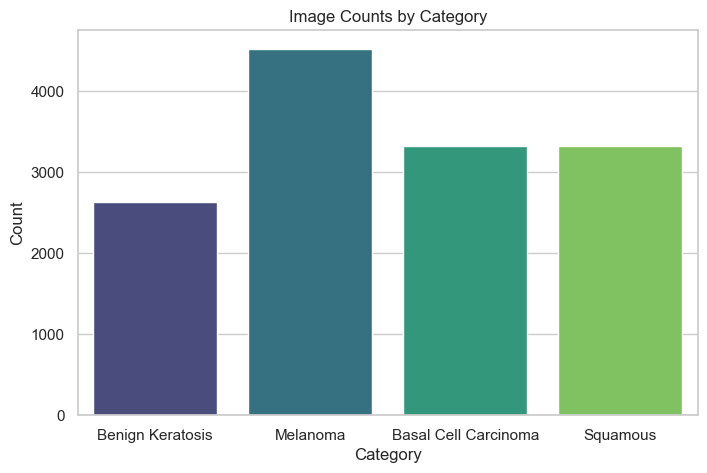

In [18]:

data = {
    'Category': ['Benign Keratosis', 'Melanoma', 'Basal Cell Carcinoma','Squamous'],
    'Count': [benign_count, melanoma_count, basal_count, squamous_count]
}
df = pd.DataFrame(data)
print(df)
# Define your custom color palette with three distinct colors
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Create the countplot
sns.barplot(x='Category', y='Count', data=df, palette='viridis')
plt.title('Image Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

plt.show()



In [19]:
# Function to load images and assign labels
def load_images_and_labels(directory, label):
    data, labels = [], []

    for image_path in directory.glob('*.jpg'): 
        if image_path.is_file():
            try:
                image = cv2.imread(str(image_path))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ensure images have RGB channels
                image = cv2.resize(image, (224, 224))
                data.append(image)
                labels.append(label)
                print(f"Loaded image: {image_path.name} with label {label}, size: {image.shape}")
            except AttributeError:
                print(f"Error loading image: {image_path.name}")

    return data, labels

#data_dir = Path('/path/to/your/images') //we can also load image using this
#label = 'your_label'

# Load images and assign labels for each category
benign_data, benign_labels = load_images_and_labels(Path(benignkeratosis_directory), 0)
melanoma_data, melanoma_labels = load_images_and_labels(Path(melanoma_directory), 1)
basal_data, basal_labels = load_images_and_labels(Path(basalcell_directory), 2)
squamous_data, squamous_labels = load_images_and_labels(Path(squamous_directory), 3)


# Combine data and labels for all categories
data = np.concatenate((benign_data, melanoma_data, basal_data,squamous_data), axis=0)
labels = np.concatenate((benign_labels, melanoma_labels, basal_labels,squamous_labels), axis=0)

# Verify the shape of the data and labels arrays
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)




Loaded image: BKL_ISIC_0010491.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012086_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012090_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012103_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012117_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012134_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012136_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012143_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012155_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012170_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012172_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012173_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012178_downsampl

Loaded image: BKL_ISIC_0012854_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012856_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012880_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012884_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012889_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012898_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012902_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012927_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012928_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012932_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012952_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0012955_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_00129

Loaded image: BKL_ISIC_0013933_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0013945_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0013958_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0013977_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0013980_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0013981_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0014006_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0014028_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0014029_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0014031_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0014032_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0014038_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_00140

Loaded image: BKL_ISIC_0014626_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0014627_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0014628_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0014629_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0014630_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0014631_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0014632_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0014633_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0014634_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0014635_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0014636_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0014637_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_00146

Loaded image: BKL_ISIC_0024909.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0024910.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0024915.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0024943.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0024947.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0024970.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0024971.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0024981.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0024982.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0024997.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0025005.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0025016.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0025030.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0025032.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0025033.jpg

Loaded image: BKL_ISIC_0026046.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0026060.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0026069.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0026070.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0026072.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0026085.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0026104.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0026107.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0026135.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0026139.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0026142.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0026153.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0026159.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0026174.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0026205.jpg

Loaded image: BKL_ISIC_0027154.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0027162.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0027167.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0027192.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0027194.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0027202.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0027218.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0027219.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0027239.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0027270.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0027275.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0027279.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0027287.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0027295.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0027310.jpg

Loaded image: BKL_ISIC_0028404.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0028411.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0028414.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0028448.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0028449.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0028451.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0028473.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0028479.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0028490.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0028496.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0028497.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0028503.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0028511.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0028525.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0028550.jpg

Loaded image: BKL_ISIC_0029427.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0029443.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0029455.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0029464.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0029472.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0029474.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0029505.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0029518.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0029519.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0029522.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0029525.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0029527.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0029548.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0029555.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0029557.jpg

Loaded image: BKL_ISIC_0030700.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0030705.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0030706.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0030721.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0030723.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0030731.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0030744.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0030758.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0030768.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0030783.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0030789.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0030801.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0030806.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0030812.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0030822.jpg

Loaded image: BKL_ISIC_0031980.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0031987.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0031989.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0032006.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0032013.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0032024.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0032031.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0032040.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0032043.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0032045.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0032051.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0032063.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0032099.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0032103.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0032111.jpg

Loaded image: BKL_ISIC_0033246.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0033252.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0033260.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0033262.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0033264.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0033270.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0033280.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0033284.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0033305.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0033306.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0033307.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0033321.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0033322.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0033361.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0033378.jpg

Loaded image: BKL_ISIC_0034186.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0034189.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0034197.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0034201.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0034221.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0034235.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0034252.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0034259.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0034280.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0034283.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0034291.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0034296.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0034303.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0034315.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0034318.jpg

Loaded image: BKL_ISIC_0055755.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0055795.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0055800.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0055816.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0055839.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0055894.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0055942.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0055955.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0055972.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0055973.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0055986.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0055988.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0056045.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0056053.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0056094.jpg

Loaded image: BKL_ISIC_0058179.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0058194.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0058195.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0058212.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0058219.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0058230.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0058261.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0058265.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0058269.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0058276.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0058277.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0058288.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0058289.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0058293.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0058299.jpg

Loaded image: BKL_ISIC_0060482.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0060488.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0060490.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0060493.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0060523.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0060560.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0060565.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0060567.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0060579.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0060594.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0060600.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0060606.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0060620.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0060639.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0060674.jpg

Loaded image: BKL_ISIC_0062168.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0062209.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0062247.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0062257.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0062258.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0062300.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0062309.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0062361.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0062363.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0062368.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0062369.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0062371.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0062374.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0062379.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0062411.jpg

Loaded image: BKL_ISIC_0064687.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0064695.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0064700.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0064702.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0064740.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0064741.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0064748.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0064750.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0064778.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0064786.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0064787.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0064793.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0064810.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0064815.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0064817.jpg

Loaded image: BKL_ISIC_0066810.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0066828.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0066857.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0066872.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0066896.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0066911.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0066914.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0066920.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0066925.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0066945.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0066946.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0066978.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0066989.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0067014.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0067034.jpg

Loaded image: BKL_ISIC_0069276.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0069284.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0069291.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0069304.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0069307.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0069312.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0069316.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0069327.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0069333.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0069341.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0069354.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0069389.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0069401.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0069406.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0069425.jpg

Loaded image: BKL_ISIC_0071190.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0071211.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0071212.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0071225.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0071241.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0071268.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0071272.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0071276.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0071317.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0071326.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0071329.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0071344.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0071356.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0071365.jpg with label 0, size: (224, 224, 3)
Loaded image: BKL_ISIC_0071380.jpg

Loaded image: melanoma_ISIC_0000002.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000004.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000013.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000022_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000026_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000029_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000030_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000031_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000035_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000036_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000040_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000043_downsampled.jpg with label 1, size: (224, 224, 3)
Load

Loaded image: melanoma_ISIC_0001100_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0001102_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0001103_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0001105_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0001106_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0001118_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0001119_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0001126_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0001128_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0001131_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0001133_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0001134_downsampled.jpg wi

Loaded image: melanoma_ISIC_0012099_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012137_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012151_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012208_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012258_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012288_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012290_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012298_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012348_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012356_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012369_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012382_downsampled.jpg wi

Loaded image: melanoma_ISIC_0013840_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013842_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013844_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013845_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013861_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013865_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013867_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013874_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013908_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013917_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013925_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013936_downsampled.jpg wi

Loaded image: melanoma_ISIC_0014525_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014527_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014541_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014542_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014543_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014545_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014546_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014548_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014557_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014558_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014559_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014663_downsampled.jpg wi

Loaded image: melanoma_ISIC_0024546.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024552.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024554.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024571.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024586.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024624.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024630.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024640.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024644.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024647.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024652.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024675.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024679.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024688.jp

Loaded image: melanoma_ISIC_0025955.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0025963.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0025964.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0025987.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0025996.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026009.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026045.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026081.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026086.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026089.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026094.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026105.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026113.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026115.jp

Loaded image: melanoma_ISIC_0027387.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027402.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027407.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027420.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027436.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027442.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027480.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027487.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027502.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027507.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027517.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027552.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027560.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027561.jp

Loaded image: melanoma_ISIC_0028901.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028915.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028916.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028929.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028930.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028965.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028968.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028969.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028984.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0029000.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0029013.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0029017.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0029021.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0029028.jp

Loaded image: melanoma_ISIC_0030445.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030486.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030501.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030507.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030512.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030521.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030539.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030552.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030564.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030575.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030604.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030616.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030623.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030653.jp

Loaded image: melanoma_ISIC_0032134.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032149.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032152.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032182.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032187.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032190.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032192.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032197.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032204.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032207.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032214.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032219.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032220.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032232.jp

Loaded image: melanoma_ISIC_0032879.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032887.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032888.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032892.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032903.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032913.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032915.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032917.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032918.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032921.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032922.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032925.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032927.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032936.jp

Loaded image: melanoma_ISIC_0033393.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033394.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033399.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033405.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033415.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033416.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033424.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033426.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033428.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033429.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033431.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033432.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033440.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033444.jp

Loaded image: melanoma_ISIC_0033942.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033946.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033947.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033953.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033956.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033957.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033962.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033967.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033968.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033975.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033977.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033980.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033981.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033985.jp

Loaded image: melanoma_ISIC_0053644.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053659.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053660.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053671.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053674.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053686.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053691.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053698.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053699.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053700.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053702.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053725.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053734.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053740.jp

Loaded image: melanoma_ISIC_0054377.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054384.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054385.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054391.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054395.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054409.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054427.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054434.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054444.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054445.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054459.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054462.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054464.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054465.jp

Loaded image: melanoma_ISIC_0055161.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055167.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055169.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055179.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055181.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055191.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055193.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055205.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055208.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055213.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055226.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055236.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055241.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055246.jp

Loaded image: melanoma_ISIC_0055832.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055840.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055841.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055859.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055862.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055876.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055887.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055892.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055899.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055902.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055905.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055907.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055911.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055918.jp

Loaded image: melanoma_ISIC_0056659.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056660.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056663.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056670.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056676.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056677.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056692.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056694.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056710.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056717.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056721.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056723.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056725.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056726.jp

Loaded image: melanoma_ISIC_0057436.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057450.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057457.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057462.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057482.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057496.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057518.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057531.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057534.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057539.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057545.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057550.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057554.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057556.jp

Loaded image: melanoma_ISIC_0058267.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058284.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058285.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058298.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058303.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058307.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058315.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058319.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058321.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058331.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058332.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058341.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058344.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058346.jp

Loaded image: melanoma_ISIC_0059089.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059092.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059093.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059104.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059129.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059140.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059141.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059147.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059148.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059165.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059170.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059171.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059178.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059181.jp

Loaded image: melanoma_ISIC_0059840.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059855.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059866.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059869.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059879.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059884.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059891.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059892.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059897.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059904.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059905.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059919.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059929.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059941.jp

Loaded image: melanoma_ISIC_0060696.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060698.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060700.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060703.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060713.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060717.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060718.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060728.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060731.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060736.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060741.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060744.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060749.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060760.jp

Loaded image: melanoma_ISIC_0061448.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061454.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061475.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061479.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061491.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061496.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061502.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061508.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061509.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061516.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061520.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061531.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061532.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061533.jp

Loaded image: melanoma_ISIC_0062125.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062133.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062138.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062141.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062155.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062158.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062160.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062161.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062162.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062163.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062171.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062181.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062196.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062204.jp

Loaded image: melanoma_ISIC_0062954.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062970.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062978.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062980.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062983.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062985.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062991.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062992.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062994.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063002.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063018.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063026.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063027.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063032.jp

Loaded image: melanoma_ISIC_0063727.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063732.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063742.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063748.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063753.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063757.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063766.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063769.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063775.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063792.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063793.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063795.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063811.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063813.jp

Loaded image: melanoma_ISIC_0064534.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064538.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064549.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064559.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064563.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064575.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064589.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064606.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064619.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064623.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064625.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064632.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064633.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064646.jp

Loaded image: melanoma_ISIC_0065283.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065305.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065307.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065313.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065315.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065324.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065338.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065341.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065346.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065351.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065360.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065367.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065374.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065379.jp

Loaded image: melanoma_ISIC_0066109.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066114.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066116.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066122.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066127.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066136.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066143.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066150.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066154.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066156.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066181.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066182.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066200.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066203.jp

Loaded image: melanoma_ISIC_0066952.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066969.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066992.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067005.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067006.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067008.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067009.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067043.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067054.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067097.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067102.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067109.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067120.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067126.jp

Loaded image: melanoma_ISIC_0067816.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067821.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067830.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067831.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067836.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067843.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067845.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067857.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067873.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067889.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067890.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067891.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067893.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067896.jp

Loaded image: melanoma_ISIC_0068584.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068586.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068614.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068616.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068617.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068627.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068628.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068629.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068633.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068646.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068673.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068677.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068682.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068692.jp

Loaded image: melanoma_ISIC_0069475.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069481.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069488.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069504.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069508.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069511.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069514.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069515.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069536.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069540.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069556.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069558.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069583.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069591.jp

Loaded image: melanoma_ISIC_0070344.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070347.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070351.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070352.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070363.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070364.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070372.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070374.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070380.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070387.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070398.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070400.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070403.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070410.jp

Loaded image: melanoma_ISIC_0071179.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071180.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071192.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071193.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071196.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071197.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071208.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071218.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071239.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071245.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071257.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071258.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071289.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071303.jp

Loaded image: melanoma_ISIC_0072030.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072041.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072051.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072061.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072063.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072077.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072078.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072087.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072093.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072099.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072101.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072103.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072109.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072111.jp

Loaded image: melanoma_ISIC_0072799.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072820.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072824.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072825.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072826.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072827.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072828.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072843.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072844.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072865.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072868.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072872.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072876.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072887.jp

Loaded image: BCC_ISIC_0025691.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0025700.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0025711.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0025718.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0025731.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0025752.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0025793.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0025818.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0025824.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0025826.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0025932.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0025940.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0025971.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0025975.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0026056.jpg

Loaded image: BCC_ISIC_0028050.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0028059.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0028079.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0028084.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0028085.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0028095.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0028106.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0028107.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0028113.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0028122.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0028147.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0028155.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0028168.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0028197.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0028238.jpg

Loaded image: BCC_ISIC_0030271.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0030314.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0030335.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0030339.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0030349.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0030352.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0030403.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0030446.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0030452.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0030511.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0030514.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0030526.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0030528.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0030574.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0030594.jpg

Loaded image: BCC_ISIC_0032497.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0032536.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0032611.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0032652.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0032660.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0032696.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0032727.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0032741.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0032768.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0032777.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0032799.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0032808.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0032816.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0032834.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0032850.jpg

Loaded image: BCC_ISIC_0053934.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0053935.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0053939.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0053951.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0053957.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0053972.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0053976.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0053993.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054018.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054031.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054036.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054055.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054060.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054063.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054065.jpg

Loaded image: BCC_ISIC_0054799.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054817.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054820.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054834.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054836.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054843.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054845.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054849.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054854.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054861.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054873.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054877.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054881.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054905.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0054917.jpg

Loaded image: BCC_ISIC_0055718.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0055721.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0055728.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0055730.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0055735.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0055736.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0055744.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0055748.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0055753.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0055758.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0055760.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0055762.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0055765.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0055766.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0055768.jpg

Loaded image: BCC_ISIC_0056661.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0056669.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0056671.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0056681.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0056685.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0056691.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0056695.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0056696.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0056703.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0056709.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0056714.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0056730.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0056731.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0056737.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0056742.jpg

Loaded image: BCC_ISIC_0057503.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0057504.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0057511.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0057523.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0057542.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0057551.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0057560.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0057564.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0057569.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0057572.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0057574.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0057587.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0057592.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0057596.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0057604.jpg

Loaded image: BCC_ISIC_0058420.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0058434.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0058447.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0058463.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0058466.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0058468.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0058472.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0058474.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0058476.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0058482.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0058483.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0058500.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0058514.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0058520.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0058527.jpg

Loaded image: BCC_ISIC_0059231.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0059236.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0059241.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0059243.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0059246.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0059254.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0059255.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0059268.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0059275.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0059306.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0059307.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0059317.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0059320.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0059324.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0059329.jpg

Loaded image: BCC_ISIC_0060086.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060093.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060101.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060107.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060109.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060112.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060117.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060119.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060120.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060127.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060133.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060135.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060137.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060139.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060144.jpg

Loaded image: BCC_ISIC_0060950.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060973.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060981.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060983.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060984.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060990.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0060991.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061020.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061022.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061026.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061035.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061054.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061055.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061056.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061062.jpg

Loaded image: BCC_ISIC_0061867.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061869.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061874.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061883.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061889.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061891.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061906.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061907.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061908.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061909.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061923.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061934.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061946.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061955.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0061979.jpg

Loaded image: BCC_ISIC_0062929.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0062936.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0062945.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0062946.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0062956.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0062962.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0062963.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0062965.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0062967.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0062984.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0063004.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0063007.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0063025.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0063031.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0063033.jpg

Loaded image: BCC_ISIC_0063859.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0063860.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0063865.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0063877.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0063892.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0063900.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0063905.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0063923.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0063928.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0063931.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0063936.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0063942.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0063947.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0063964.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0063967.jpg

Loaded image: BCC_ISIC_0064805.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0064814.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0064824.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0064830.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0064832.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0064841.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0064843.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0064864.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0064869.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0064884.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0064885.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0064898.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0064899.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0064931.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0064939.jpg

Loaded image: BCC_ISIC_0065684.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0065696.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0065699.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0065703.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0065710.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0065721.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0065739.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0065743.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0065751.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0065752.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0065771.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0065780.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0065785.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0065790.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0065797.jpg

Loaded image: BCC_ISIC_0066544.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0066549.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0066555.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0066558.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0066561.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0066566.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0066569.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0066570.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0066572.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0066575.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0066592.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0066598.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0066608.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0066620.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0066623.jpg

Loaded image: BCC_ISIC_0067337.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0067341.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0067345.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0067346.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0067354.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0067357.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0067376.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0067380.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0067386.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0067400.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0067403.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0067409.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0067426.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0067429.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0067439.jpg

Loaded image: BCC_ISIC_0068302.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0068306.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0068313.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0068322.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0068330.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0068338.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0068339.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0068345.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0068346.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0068352.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0068353.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0068355.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0068356.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0068358.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0068363.jpg

Loaded image: BCC_ISIC_0069228.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0069235.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0069244.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0069249.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0069255.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0069259.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0069261.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0069272.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0069287.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0069295.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0069299.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0069300.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0069301.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0069306.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0069311.jpg

Loaded image: BCC_ISIC_0070096.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0070101.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0070102.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0070128.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0070131.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0070138.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0070146.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0070148.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0070150.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0070151.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0070154.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0070156.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0070162.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0070165.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0070183.jpg

Loaded image: BCC_ISIC_0070958.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0070966.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0070975.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0070994.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0070997.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0071003.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0071005.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0071008.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0071029.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0071030.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0071053.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0071056.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0071085.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0071099.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0071102.jpg

Loaded image: BCC_ISIC_0071967.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0071968.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0071979.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0071987.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0071991.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072023.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072028.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072029.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072034.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072035.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072047.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072048.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072052.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072060.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072066.jpg

Loaded image: BCC_ISIC_0072792.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072805.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072807.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072809.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072810.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072813.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072818.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072835.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072839.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072842.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072851.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072852.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072853.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072856.jpg with label 2, size: (224, 224, 3)
Loaded image: BCC_ISIC_0072857.jpg

Loaded image: SCC_ISIC_0025691.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0025700.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0025711.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0025718.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0025731.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0025752.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0025793.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0025818.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0025824.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0025826.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0025932.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0025940.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0025971.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0025975.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0026056.jpg

Loaded image: SCC_ISIC_0028486.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0028495.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0028542.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0028556.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0028568.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0028570.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0028577.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0028583.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0028652.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0028653.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0028670.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0028671.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0028677.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0028687.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0028688.jpg

Loaded image: SCC_ISIC_0031009.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0031026.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0031041.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0031056.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0031057.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0031062.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0031063.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0031095.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0031122.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0031140.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0031154.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0031166.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0031169.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0031171.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0031175.jpg

Loaded image: SCC_ISIC_0033372.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0033468.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0033483.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0033499.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0033504.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0033551.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0033571.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0033575.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0033579.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0033609.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0033666.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0033720.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0033747.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0033979.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0034015.jpg

Loaded image: SCC_ISIC_0054215.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0054227.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0054240.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0054241.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0054243.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0054279.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0054295.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0054299.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0054306.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0054316.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0054322.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0054338.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0054339.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0054340.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0054343.jpg

Loaded image: SCC_ISIC_0055108.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0055109.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0055111.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0055119.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0055123.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0055135.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0055137.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0055178.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0055180.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0055194.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0055201.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0055206.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0055209.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0055221.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0055223.jpg

Loaded image: SCC_ISIC_0056020.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0056024.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0056027.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0056030.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0056039.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0056042.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0056083.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0056088.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0056095.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0056097.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0056099.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0056100.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0056106.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0056124.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0056126.jpg

Loaded image: SCC_ISIC_0057054.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0057056.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0057057.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0057058.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0057069.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0057075.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0057086.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0057088.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0057090.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0057101.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0057104.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0057111.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0057112.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0057114.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0057117.jpg

Loaded image: SCC_ISIC_0058025.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058038.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058039.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058043.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058058.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058060.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058061.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058064.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058065.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058067.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058069.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058084.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058088.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058091.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058104.jpg

Loaded image: SCC_ISIC_0058898.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058900.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058903.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058905.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058911.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058915.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058964.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058966.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058973.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058978.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058984.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058987.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058991.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058995.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0058996.jpg

Loaded image: SCC_ISIC_0059775.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0059776.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0059793.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0059801.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0059802.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0059806.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0059811.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0059815.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0059821.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0059826.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0059845.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0059847.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0059854.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0059865.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0059873.jpg

Loaded image: SCC_ISIC_0060627.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0060637.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0060640.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0060642.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0060643.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0060645.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0060657.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0060662.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0060673.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0060680.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0060682.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0060683.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0060684.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0060685.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0060687.jpg

Loaded image: SCC_ISIC_0061481.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0061483.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0061484.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0061490.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0061497.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0061504.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0061511.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0061512.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0061515.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0061541.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0061543.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0061548.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0061555.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0061571.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0061577.jpg

Loaded image: SCC_ISIC_0062615.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0062620.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0062623.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0062634.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0062637.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0062645.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0062657.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0062659.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0062664.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0062666.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0062682.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0062683.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0062685.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0062710.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0062722.jpg

Loaded image: SCC_ISIC_0063562.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0063563.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0063572.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0063575.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0063586.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0063587.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0063597.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0063599.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0063610.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0063612.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0063614.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0063633.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0063640.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0063649.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0063651.jpg

Loaded image: SCC_ISIC_0064496.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0064506.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0064510.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0064512.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0064519.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0064544.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0064555.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0064556.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0064570.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0064578.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0064588.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0064599.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0064603.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0064605.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0064608.jpg

Loaded image: SCC_ISIC_0065334.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0065345.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0065361.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0065362.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0065368.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0065376.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0065384.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0065385.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0065391.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0065397.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0065401.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0065407.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0065422.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0065428.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0065429.jpg

Loaded image: SCC_ISIC_0066190.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0066197.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0066198.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0066202.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0066206.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0066210.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0066214.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0066221.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0066224.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0066233.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0066238.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0066248.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0066250.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0066257.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0066271.jpg

Loaded image: SCC_ISIC_0067000.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067020.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067021.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067032.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067042.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067049.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067051.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067055.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067057.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067063.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067070.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067072.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067076.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067079.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067080.jpg

Loaded image: SCC_ISIC_0067833.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067839.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067850.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067851.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067869.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067876.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067892.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067910.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067940.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067954.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067956.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067967.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067988.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067990.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0067991.jpg

Loaded image: SCC_ISIC_0068783.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0068786.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0068791.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0068792.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0068793.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0068810.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0068813.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0068815.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0068832.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0068856.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0068862.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0068869.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0068878.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0068898.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0068899.jpg

Loaded image: SCC_ISIC_0069589.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0069601.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0069604.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0069628.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0069639.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0069646.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0069649.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0069650.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0069652.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0069659.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0069679.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0069696.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0069701.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0069703.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0069709.jpg

Loaded image: SCC_ISIC_0070529.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0070532.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0070534.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0070536.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0070537.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0070539.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0070541.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0070552.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0070568.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0070573.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0070608.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0070612.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0070620.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0070625.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0070642.jpg

Loaded image: SCC_ISIC_0071414.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0071416.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0071419.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0071422.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0071438.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0071441.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0071446.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0071448.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0071450.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0071459.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0071461.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0071466.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0071480.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0071482.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0071483.jpg

Loaded image: SCC_ISIC_0072359.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0072361.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0072365.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0072376.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0072386.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0072406.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0072427.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0072431.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0072433.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0072434.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0072450.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0072453.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0072455.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0072457.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0072461.jpg

Loaded image: SCC_ISIC_0073071.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0073079.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0073081.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0073082.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0073091.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0073109.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0073111.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0073113.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0073116.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0073122.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0073123.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0073128.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0073137.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0073148.jpg with label 3, size: (224, 224, 3)
Loaded image: SCC_ISIC_0073149.jpg

In [20]:
# Convert features and labels to NumPy arrays
feats, labels = np.array(data), np.array(labels)

# Define paths for saving and loading features and labels
feats_save_path, labels_save_path = "C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\Training\\feats_train.npy", "C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\Training\\labels_train.npy"

# Save the arrays to the specified paths
np.save(feats_save_path, feats)
np.save(labels_save_path, labels)

# Confirm that the arrays have been saved
print("Features saved to:", feats_save_path)
print("Labels saved to:", labels_save_path)

# Load the features (data) and labels
loaded_feats, loaded_labels = np.load(feats_save_path), np.load(labels_save_path)
print("Features shape:", loaded_feats.shape)
print(loaded_feats)
print("Labels shape:", loaded_labels.shape)
print(loaded_labels)

Features saved to: C:\Users\prera\Desktop\preml\ISIC_2019_Training_Input\Training\feats_train.npy
Labels saved to: C:\Users\prera\Desktop\preml\ISIC_2019_Training_Input\Training\labels_train.npy
Features shape: (13792, 224, 224, 3)
[[[[122 111 109]
   [125 109 106]
   [ 92  69  67]
   ...
   [134 133 131]
   [131 130 128]
   [128 127 125]]

  [[118 110 107]
   [126 115 111]
   [109  91  87]
   ...
   [135 135 132]
   [132 131 129]
   [129 128 126]]

  [[119 109 107]
   [114 103  99]
   [123 112 106]
   ...
   [135 134 132]
   [132 131 128]
   [131 130 128]]

  ...

  [[127 116 114]
   [125 114 110]
   [125 114 108]
   ...
   [133 128 122]
   [132 128 121]
   [132 127 121]]

  [[127 117 115]
   [124 115 110]
   [125 116 109]
   ...
   [131 126 120]
   [128 123 117]
   [127 122 116]]

  [[123 115 111]
   [124 117 111]
   [130 123 115]
   ...
   [135 130 124]
   [132 127 121]
   [130 125 120]]]


 [[[ 16  17  20]
   [ 16  15  20]
   [ 15  15  17]
   ...
   [ 66  75 104]
   [ 64  79 113]
 

In [21]:
from sklearn.utils import shuffle #random

loaded_feats, loaded_labels = shuffle(loaded_feats, loaded_labels, random_state=42)  # Use a specific random state for reproducibility


In [22]:
#Train Test Split
# splitting cells images into 80:20 ratio i.e., 80% for training and 20% for testing purpose
# Split the data and labels into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(loaded_feats, loaded_labels, test_size=0.2, random_state=42)


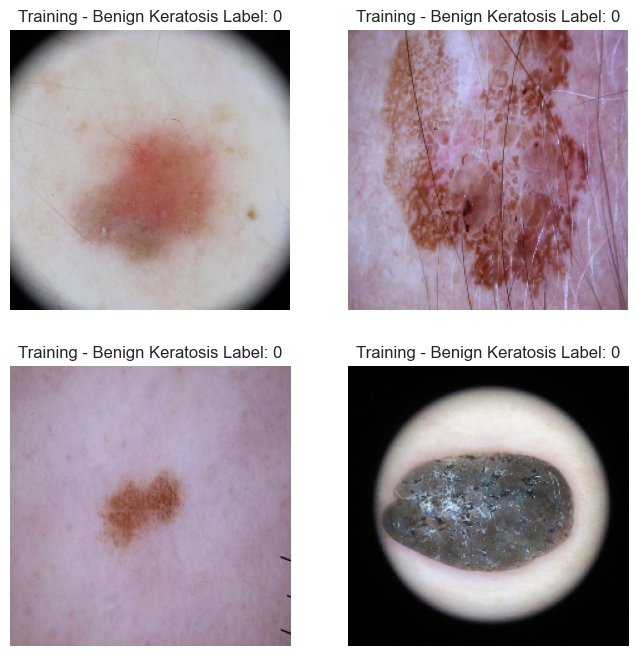

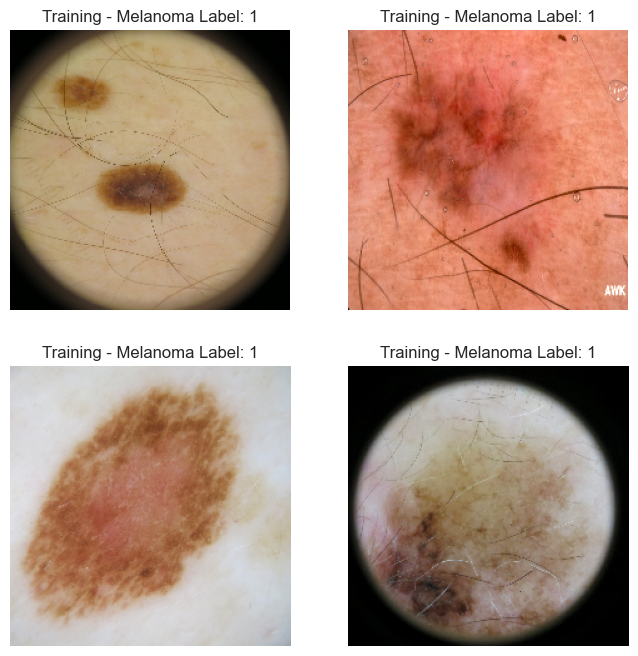

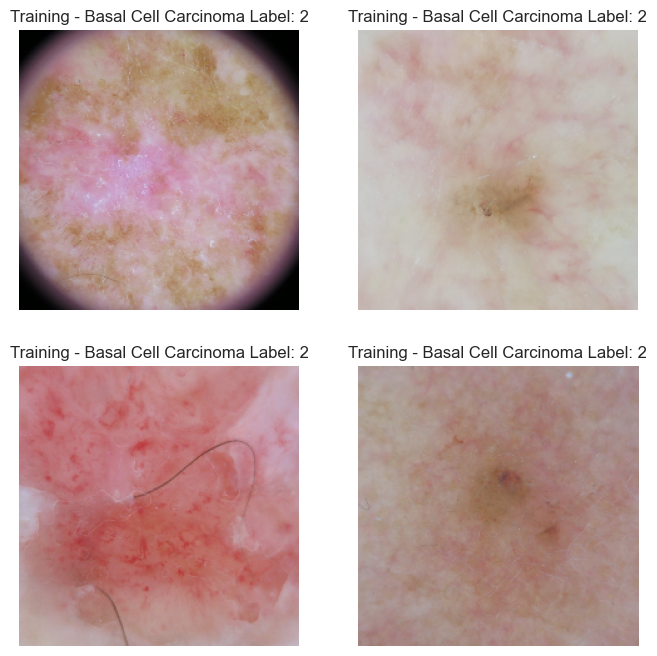

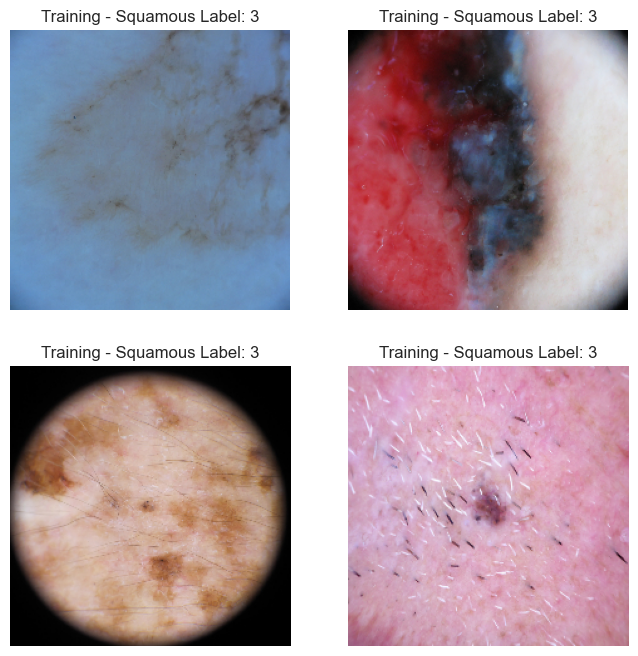

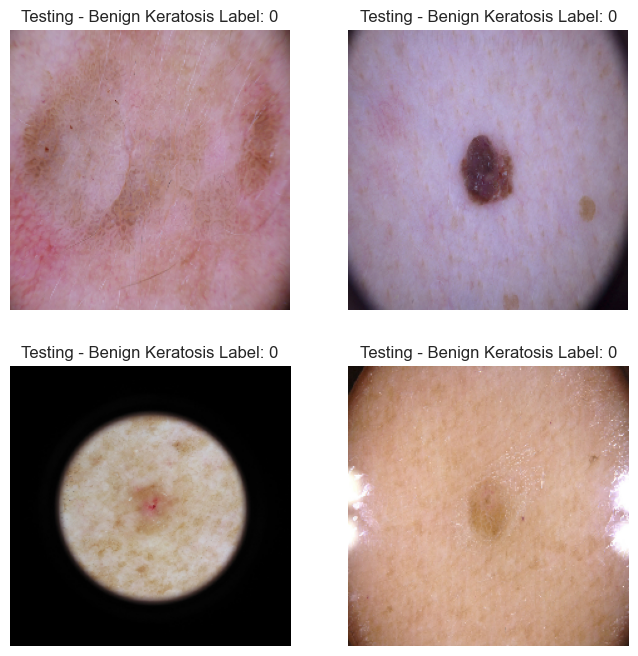

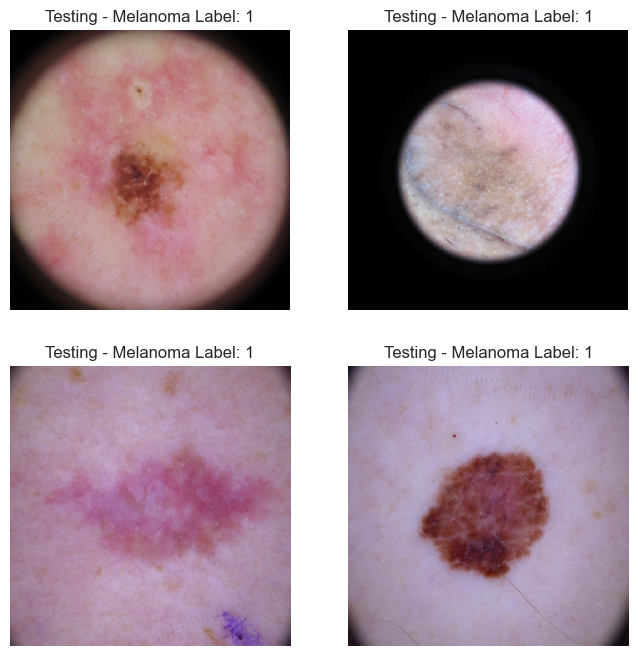

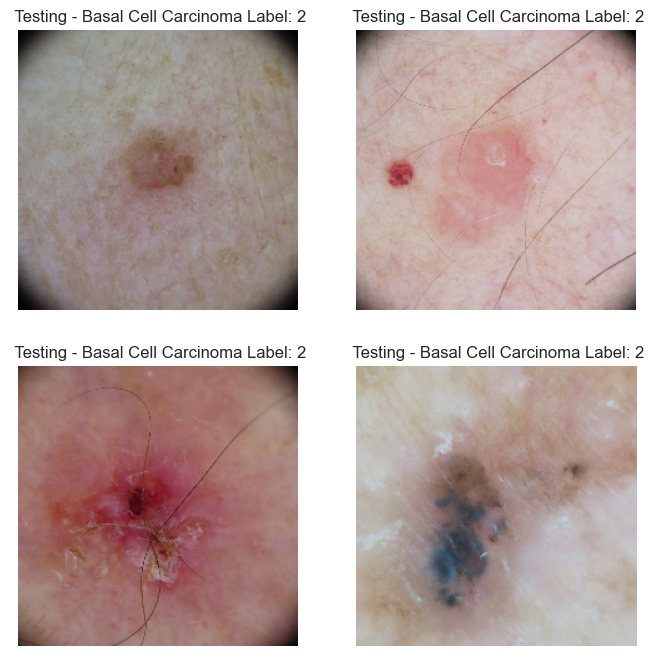

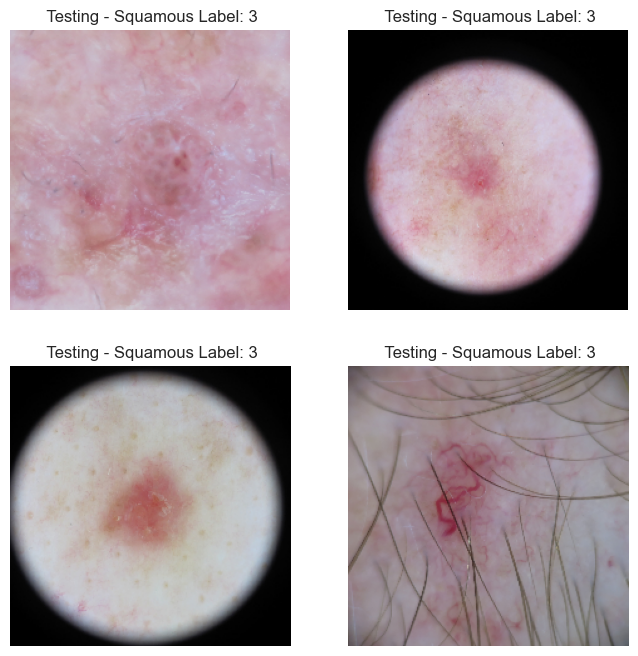

In [23]:
# Function to display random images with labels
def display_random_images_with_labels(data, labels, num_images=4, title_prefix=""):
    rows = 2
    cols = 2
    plt.figure(figsize=(8, 8))
    
    indices = random.sample(range(len(data)), num_images) #????? # Select random indices
    
    for i, index in enumerate(indices):
        image = data[index]
        label = labels[index]
        
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image)
        plt.title(f'{title_prefix} Label: {label}')
        plt.axis('off')

# Select random images from each class for display
random_indices_benign = random.sample(range(len(x_train[y_train == 0])), 4)
random_indices_melanoma = random.sample(range(len(x_train[y_train == 1])), 4)
random_indices_basal = random.sample(range(len(x_train[y_train == 2])), 4)
random_indices_squamous = random.sample(range(len(x_train[y_train == 3])), 4)

# Display random images from each class in the training set before preprocessing
display_random_images_with_labels(x_train[y_train == 0][random_indices_benign], y_train[y_train == 0][random_indices_benign], num_images=4, title_prefix="Training - Benign Keratosis")
display_random_images_with_labels(x_train[y_train == 1][random_indices_melanoma], y_train[y_train == 1][random_indices_melanoma], num_images=4, title_prefix="Training - Melanoma")
display_random_images_with_labels(x_train[y_train == 2][random_indices_basal], y_train[y_train == 2][random_indices_basal], num_images=4, title_prefix="Training - Basal Cell Carcinoma")
display_random_images_with_labels(x_train[y_train == 3][random_indices_squamous], y_train[y_train == 3][random_indices_squamous], num_images=4, title_prefix="Training - Squamous")

# Show the plot for training set before preprocessing
plt.show()
                                     
# Select random images from each class for display in the testing set
random_indices_benign_test = random.sample(range(len(x_test[y_test == 0])), 4)
random_indices_melanoma_test = random.sample(range(len(x_test[y_test == 1])), 4)
random_indices_basal_test = random.sample(range(len(x_test[y_test == 2])), 4)
random_indices_squamous_test = random.sample(range(len(x_test[y_test == 3])), 4)

# Display random images from each class in the testing set before preprocessing
display_random_images_with_labels(x_test[y_test == 0][random_indices_benign_test], y_test[y_test == 0][random_indices_benign_test], num_images=4, title_prefix="Testing - Benign Keratosis")
display_random_images_with_labels(x_test[y_test == 1][random_indices_melanoma_test], y_test[y_test == 1][random_indices_melanoma_test], num_images=4, title_prefix="Testing - Melanoma")
display_random_images_with_labels(x_test[y_test == 2][random_indices_basal_test], y_test[y_test == 2][random_indices_basal_test], num_images=4, title_prefix=" Testing - Basal Cell Carcinoma")
display_random_images_with_labels(x_test[y_test == 3][random_indices_squamous_test], y_test[y_test == 3   ][random_indices_squamous_test], num_images=4, title_prefix=" Testing - Squamous")

# Show the plot for testing set before preprocessing
plt.show()

In [24]:
# Image Data Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
# Calculate class weights based on the training dataset
num_classes = 4  # Adjust according to your dataset
class_labels = np.unique(y_train)  # Extract unique class labels from y_train
class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=y_train)
class_wt_dict = dict(enumerate(class_weights))


# Define data augmentation for the training set
trainAug = ImageDataGenerator(
    rotation_range=11,
    zoom_range=0.11,
    width_shift_range=0.10,
    height_shift_range=0.12,
    horizontal_flip=True
    )

# Define data augmentation for the validation set
valAug = ImageDataGenerator()  #???????

# Set the batch size
BS = 32

from tensorflow.keras.utils import to_categorical
# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=4)
y_test_one_hot = to_categorical(y_test, num_classes=4)


train_len = len(x_train)
test_len = len(x_test)


In [35]:
from tensorflow.keras.applications import *
 #Load the pre-trained EfficientNetB4 model without the top (classification) layers
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Set the number of layers to fine-tune
fine_tune_layers = 450

# Freeze the first few layers and unfreeze the rest
for layer in base_model.layers[:-fine_tune_layers]:
    layer.trainable = False
for layer in base_model.layers[-fine_tune_layers:]:
    layer.trainable = True

In [36]:

from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
from tensorflow.keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, concatenate

# Connect the output of the base model to a new variable x
x = base_model.output
x_maxpool = GlobalMaxPooling2D()(x)
x_avgpool = GlobalAveragePooling2D()(x)
# Combine the output of pooling layers (if both used)
if x_maxpool is not None and x_avgpool is not None:
    x = layers.concatenate([x_maxpool, x_avgpool])
elif x_maxpool is not None:
    x = x_maxpool
elif x_avgpool is not None:
    x = x_avgpool
# Add fully connected layers and dropout
x = layers.Dense(150, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(50, activation='relu')(x)
x = layers.Dropout(0.15)(x)
# Output layer for classification (adjust the number of units for your task)
predictions = layers.Dense(4, activation='softmax')(x)
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_1[0][0]'

                                                                                                  
 block2a_expand_conv (Conv2  (None, 112, 112, 144)        3456      ['block1b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block2a_expand_bn (BatchNo  (None, 112, 112, 144)        576       ['block2a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block2a_expand_activation   (None, 112, 112, 144)        0         ['block2a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block2a_d

 block2c_expand_conv (Conv2  (None, 56, 56, 192)          6144      ['block2b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block2c_expand_bn (BatchNo  (None, 56, 56, 192)          768       ['block2c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block2c_expand_activation   (None, 56, 56, 192)          0         ['block2c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block2c_dwconv (DepthwiseC  (None, 56, 56, 192)          1728      ['block2c_expand_activation[0]
 onv2D)   

                                                                                                  
 block3a_expand_conv (Conv2  (None, 56, 56, 192)          6144      ['block2d_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block3a_expand_bn (BatchNo  (None, 56, 56, 192)          768       ['block3a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block3a_expand_activation   (None, 56, 56, 192)          0         ['block3a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block3a_d

 block3c_expand_conv (Conv2  (None, 28, 28, 336)          18816     ['block3b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block3c_expand_bn (BatchNo  (None, 28, 28, 336)          1344      ['block3c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block3c_expand_activation   (None, 28, 28, 336)          0         ['block3c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block3c_dwconv (DepthwiseC  (None, 28, 28, 336)          8400      ['block3c_expand_activation[0]
 onv2D)   

                                                                                                  
 block4a_expand_conv (Conv2  (None, 28, 28, 336)          18816     ['block3d_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block4a_expand_bn (BatchNo  (None, 28, 28, 336)          1344      ['block4a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4a_expand_activation   (None, 28, 28, 336)          0         ['block4a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4a_d

 block4c_expand_conv (Conv2  (None, 14, 14, 672)          75264     ['block4b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block4c_expand_bn (BatchNo  (None, 14, 14, 672)          2688      ['block4c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4c_expand_activation   (None, 14, 14, 672)          0         ['block4c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4c_dwconv (DepthwiseC  (None, 14, 14, 672)          6048      ['block4c_expand_activation[0]
 onv2D)   

                                                                                                  
 block4e_expand_conv (Conv2  (None, 14, 14, 672)          75264     ['block4d_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block4e_expand_bn (BatchNo  (None, 14, 14, 672)          2688      ['block4e_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4e_expand_activation   (None, 14, 14, 672)          0         ['block4e_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4e_d

                                                                     'block4e_add[0][0]']         
                                                                                                  
 block5a_expand_conv (Conv2  (None, 14, 14, 672)          75264     ['block4f_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5a_expand_bn (BatchNo  (None, 14, 14, 672)          2688      ['block5a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5a_expand_activation   (None, 14, 14, 672)          0         ['block5a_expand_bn[0][0]']   
 (Activation)                                                                                     
          

                                                                                                  
 block5c_expand_bn (BatchNo  (None, 14, 14, 960)          3840      ['block5c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5c_expand_activation   (None, 14, 14, 960)          0         ['block5c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5c_dwconv (DepthwiseC  (None, 14, 14, 960)          24000     ['block5c_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5c_b

 D)                                                                                               
                                                                                                  
 block5e_expand_bn (BatchNo  (None, 14, 14, 960)          3840      ['block5e_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5e_expand_activation   (None, 14, 14, 960)          0         ['block5e_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5e_dwconv (DepthwiseC  (None, 14, 14, 960)          24000     ['block5e_expand_activation[0]
 onv2D)                                                             [0]']                         
          

 block6a_expand_conv (Conv2  (None, 14, 14, 960)          153600    ['block5f_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6a_expand_bn (BatchNo  (None, 14, 14, 960)          3840      ['block6a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6a_expand_activation   (None, 14, 14, 960)          0         ['block6a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6a_dwconv_pad (ZeroPa  (None, 17, 17, 960)          0         ['block6a_expand_activation[0]
 dding2D) 

 D)                                                                                               
                                                                                                  
 block6c_expand_bn (BatchNo  (None, 7, 7, 1632)           6528      ['block6c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6c_expand_activation   (None, 7, 7, 1632)           0         ['block6c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6c_dwconv (DepthwiseC  (None, 7, 7, 1632)           40800     ['block6c_expand_activation[0]
 onv2D)                                                             [0]']                         
          

 block6e_expand_conv (Conv2  (None, 7, 7, 1632)           443904    ['block6d_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6e_expand_bn (BatchNo  (None, 7, 7, 1632)           6528      ['block6e_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6e_expand_activation   (None, 7, 7, 1632)           0         ['block6e_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6e_dwconv (DepthwiseC  (None, 7, 7, 1632)           40800     ['block6e_expand_activation[0]
 onv2D)   

                                                                                                  
 block6g_expand_conv (Conv2  (None, 7, 7, 1632)           443904    ['block6f_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6g_expand_bn (BatchNo  (None, 7, 7, 1632)           6528      ['block6g_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6g_expand_activation   (None, 7, 7, 1632)           0         ['block6g_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6g_d

                                                                     'block6g_add[0][0]']         
                                                                                                  
 block7a_expand_conv (Conv2  (None, 7, 7, 1632)           443904    ['block6h_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block7a_expand_bn (BatchNo  (None, 7, 7, 1632)           6528      ['block7a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block7a_expand_activation   (None, 7, 7, 1632)           0         ['block7a_expand_bn[0][0]']   
 (Activation)                                                                                     
          

 top_bn (BatchNormalization  (None, 7, 7, 1792)           7168      ['top_conv[0][0]']            
 )                                                                                                
                                                                                                  
 top_activation (Activation  (None, 7, 7, 1792)           0         ['top_bn[0][0]']              
 )                                                                                                
                                                                                                  
 global_max_pooling2d_1 (Gl  (None, 1792)                 0         ['top_activation[0][0]']      
 obalMaxPooling2D)                                                                                
                                                                                                  
 global_average_pooling2d_1  (None, 1792)                 0         ['top_activation[0][0]']      
  (GlobalA

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
model_chkpt = ModelCheckpoint('C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\Training\\skinmodelfile.hdf5',save_best_only=True, monitor='val_loss',mode='min',verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.31, patience=2,mode='min', min_lr=0.0000001,verbose=1)

callback_list = [model_chkpt,lr_reduce]


In [38]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Modify your data generators to yield a tuple of (image, metadata) as inputs
trainGen = trainAug.flow(x_train, y_train_one_hot, batch_size=BS)
valGen = valAug.flow(x_test, y_test_one_hot, batch_size=BS)
# Train the model
history = model.fit(
    trainGen,
    epochs=25,
    validation_data=valGen,
    class_weight=class_wt_dict,
    callbacks=callback_list
)



Epoch 1/25
345/345 [==============================] - ETA: 0s - loss: 1.1803 - accuracy: 0.4544
Epoch 1: val_loss improved from inf to 1.90237, saving model to C:\Users\prera\Desktop\preml\ISIC_2019_Training_Input\Training\skinmodelfile.hdf5


C:\Users\prera\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


345/345 [==============================] - 3218s 9s/step - loss: 1.1803 - accuracy: 0.4544 - val_loss: 1.9024 - val_accuracy: 0.2602 - lr: 0.0010
Epoch 2/25
345/345 [==============================] - ETA: 0s - loss: 0.9518 - accuracy: 0.5384
Epoch 2: val_loss improved from 1.90237 to 1.37456, saving model to C:\Users\prera\Desktop\preml\ISIC_2019_Training_Input\Training\skinmodelfile.hdf5
345/345 [==============================] - 3156s 9s/step - loss: 0.9518 - accuracy: 0.5384 - val_loss: 1.3746 - val_accuracy: 0.2900 - lr: 0.0010
Epoch 3/25
345/345 [==============================] - ETA: 0s - loss: 0.8795 - accuracy: 0.5749
Epoch 3: val_loss improved from 1.37456 to 1.25545, saving model to C:\Users\prera\Desktop\preml\ISIC_2019_Training_Input\Training\skinmodelfile.hdf5
345/345 [==============================] - 3255s 9s/step - loss: 0.8795 - accuracy: 0.5749 - val_loss: 1.2554 - val_accuracy: 0.4030 - lr: 0.0010
Epoch 4/25
345/345 [==============================] - ETA: 0s - loss: 

Epoch 25/25
345/345 [==============================] - ETA: 0s - loss: 0.3845 - accuracy: 0.7489
Epoch 25: val_loss did not improve from 0.56674
345/345 [==============================] - 3171s 9s/step - loss: 0.3845 - accuracy: 0.7489 - val_loss: 0.5955 - val_accuracy: 0.6995 - lr: 2.7513e-07


In [40]:
from tensorflow.keras.models import load_model
skincancermodel = load_model("C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\Training\\skinmodelfile.hdf5")



In [41]:

# Evaluate the model on the training dataset
train_loss, train_accuracy = skincancermodel.evaluate(x_train, y_train_one_hot, verbose=1)
print('Training Loss:', train_loss)
print('Training Accuracy:', train_accuracy)
# Evaluate the model on the testing dataset
test_loss, test_accuracy = skincancermodel.evaluate(x_test, y_test_one_hot, verbose=1)
print('Testing Loss:', test_loss)
print('Testing Accuracy:', test_accuracy)



345/345 [==============================] - 662s 2s/step - loss: 0.3485 - accuracy: 0.7551
Training Loss: 0.34850770235061646
Training Accuracy: 0.7550983428955078
87/87 [==============================] - 168s 2s/step - loss: 0.5667 - accuracy: 0.7003
Testing Loss: 0.5667392611503601
Testing Accuracy: 0.7002537250518799


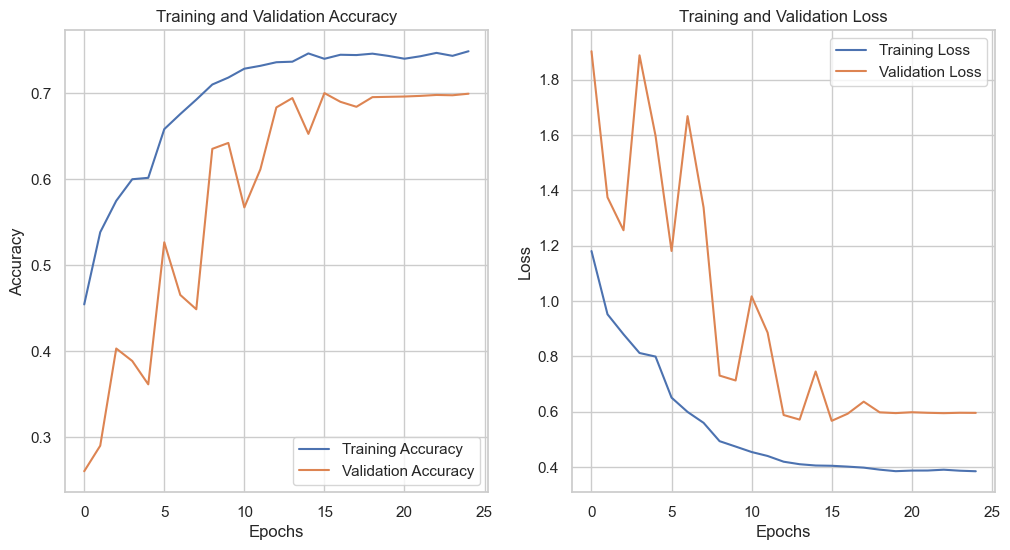

In [43]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


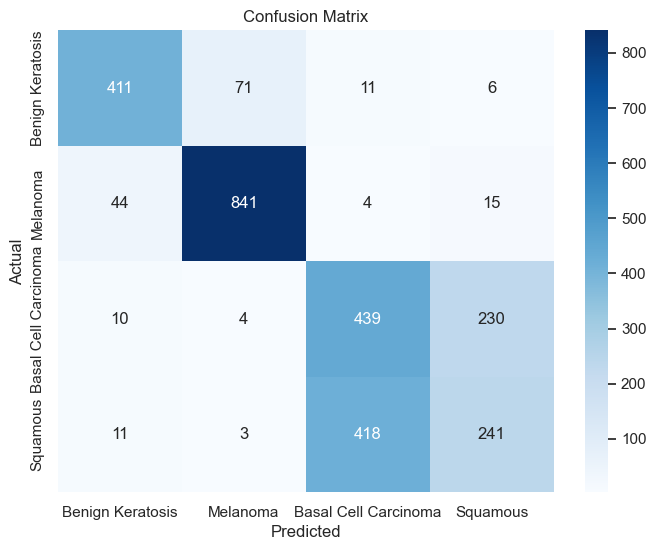

                      precision    recall  f1-score   support

    Benign Keratosis       0.86      0.82      0.84       499
            Melanoma       0.92      0.93      0.92       904
Basal Cell Carcinoma       0.50      0.64      0.56       683
            Squamous       0.49      0.36      0.41       673

            accuracy                           0.70      2759
           macro avg       0.69      0.69      0.69      2759
        weighted avg       0.70      0.70      0.70      2759



In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Make predictions on the test dataset
predicted_probs = skincancermodel.predict(x_test, batch_size=16, verbose=0)

# Calculate the confusion matrix using probabilities
confusion_mtx = confusion_matrix(np.argmax(y_test_one_hot, axis=1), np.argmax(predicted_probs, axis=1))

# Define class labels
class_labels = ['Benign Keratosis', 'Melanoma', 'Basal Cell Carcinoma','Squamous']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report with probabilities
report = classification_report(np.argmax(y_test_one_hot, axis=1), np.argmax(predicted_probs, axis=1), target_names=class_labels)
print(report)

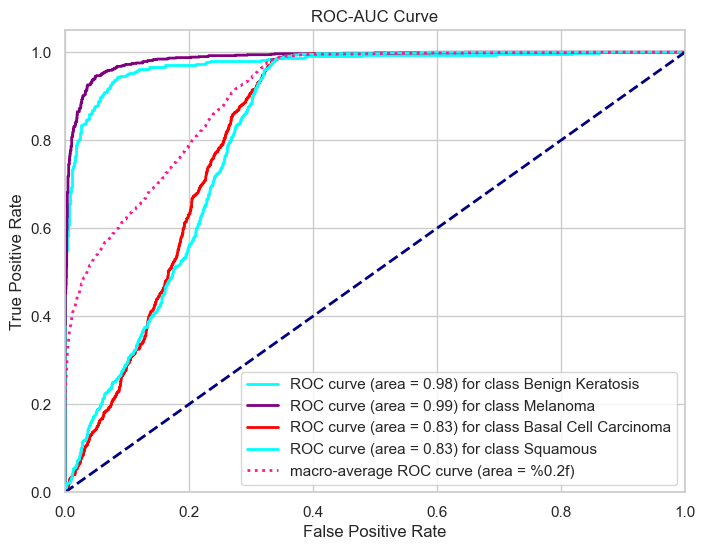

In [50]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(class_labels)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
lw = 2
colors = cycle(['aqua', 'purple', 'red'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], class_labels[i]))

plt.plot(fpr["macro"], tpr["macro"], color='deeppink', linestyle=':', lw=lw,
         label='macro-average ROC curve (area = %0.2f)')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
# Define the paths to the directories on your local machine
benignkeratosistest_directory = "C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\testing\\BenignKeratosisTest"
melanomatest_directory = "C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\testing\\MelanomaTest"
basalcelltest_directory = "C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\testing\\BasalCellCarcinomaTest"
squamoustest_directory = "C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\testing\\SquamousTest"

# List the files and directories in each of the specified directories
benigntestimages=os.listdir(benignkeratosistest_directory)
melanomatestimages = os.listdir(melanomatest_directory)
basaltestimages = os.listdir(basalcelltest_directory)
squamoustestimages = os.listdir(squamoustest_directory)


benigntest_count = len(benigntestimages)
melanomatest_count = len(melanomatestimages)
basaltest_count = len(basaltestimages)
squamoustest_count=len(squamoustestimages)
totaltest_count=benigntest_count+melanomatest_count+basaltest_count+squamoustest_count
print('The total no of images:',totaltest_count)

The total no of images: 200


In [52]:
# Function to load test images and assign labels
def load_test_images_and_labels(directory, label):
    data, labels = [], []

    for image_path in directory.glob('*.jpg'):
        if image_path.is_file():
            try:
                image = cv2.imread(str(image_path))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ensure images have RGB channels
                image = cv2.resize(image, (224, 224))
                data.append(image)
                labels.append(label)
                print(f"Loaded test image: {image_path.name} with label {label}, size: {image.shape}")
            except AttributeError:
                print(f"Error loading test image: {image_path.name}")

    return data, labels

# Load test images and assign labels for each category
benign_test_data, benign_test_labels = load_test_images_and_labels(Path(benignkeratosistest_directory), 0)
melanoma_test_data, melanoma_test_labels = load_test_images_and_labels(Path(melanomatest_directory), 1)
basal_test_data, basal_test_labels = load_test_images_and_labels(Path(basalcelltest_directory), 2)
squamous_test_data, squamous_test_labels = load_test_images_and_labels(Path(squamoustest_directory), 3)

# Combine test data and labels for all categories
test_data = np.concatenate((benign_test_data, melanoma_test_data, basal_test_data, squamous_test_data), axis=0)
test_labels = np.concatenate((benign_test_labels, melanoma_test_labels, basal_test_labels, squamous_test_labels), axis=0)

# Verify the shape of the test data and labels arrays
print("Test Data shape:", test_data.shape)
print("Test Labels shape:", test_labels.shape)



Loaded test image: BKL_ISIC_0012173_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded test image: BKL_ISIC_0012178_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded test image: BKL_ISIC_0012183_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded test image: BKL_ISIC_0012199_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded test image: BKL_ISIC_0012204_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded test image: BKL_ISIC_0012207_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded test image: BKL_ISIC_0012210_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded test image: BKL_ISIC_0012217_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded test image: BKL_ISIC_0012223_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded test image: BKL_ISIC_0012224_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded test image: BKL_ISIC_0012227_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded test image: BKL_ISIC_0012237_downsampled.jpg wi

Loaded test image: BCC_ISIC_0025644.jpg with label 2, size: (224, 224, 3)
Loaded test image: BCC_ISIC_0025650.jpg with label 2, size: (224, 224, 3)
Loaded test image: BCC_ISIC_0025691.jpg with label 2, size: (224, 224, 3)
Loaded test image: BCC_ISIC_0025700.jpg with label 2, size: (224, 224, 3)
Loaded test image: BCC_ISIC_0025711.jpg with label 2, size: (224, 224, 3)
Loaded test image: BCC_ISIC_0025718.jpg with label 2, size: (224, 224, 3)
Loaded test image: BCC_ISIC_0025826.jpg with label 2, size: (224, 224, 3)
Loaded test image: BCC_ISIC_0025932.jpg with label 2, size: (224, 224, 3)
Loaded test image: BCC_ISIC_0025940.jpg with label 2, size: (224, 224, 3)
Loaded test image: BCC_ISIC_0025971.jpg with label 2, size: (224, 224, 3)
Loaded test image: BCC_ISIC_0025975.jpg with label 2, size: (224, 224, 3)
Loaded test image: BCC_ISIC_0026056.jpg with label 2, size: (224, 224, 3)
Loaded test image: BCC_ISIC_0026154.jpg with label 2, size: (224, 224, 3)
Loaded test image: BCC_ISIC_0026156.jp

In [54]:
# Convert test features and labels to NumPy arrays
test_feats, test_labels = np.array(test_data), np.array(test_labels)

# Define paths for saving and loading test features and labels
test_feats_save_path, test_labels_save_path = "C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\testing\\feats_test.npy", "C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\testing\\labels_test.npy"

# Save the test arrays to the specified paths
np.save(test_feats_save_path, test_feats)
np.save(test_labels_save_path, test_labels)

# Confirm that the test arrays have been saved
print("Test Features saved to:", test_feats_save_path)
print("Test Labels saved to:", test_labels_save_path)

# Load the test features and labels
loaded_test_feats, loaded_test_labels = np.load(test_feats_save_path), np.load(test_labels_save_path)
print("Test Features shape:", loaded_test_feats.shape)
print("Test Labels shape:", loaded_test_labels.shape)
x_valid = loaded_test_feats.astype('float32')/255
y_valid=to_categorical(loaded_test_labels,4)


Test Features saved to: C:\Users\prera\Desktop\preml\ISIC_2019_Training_Input\testing\feats_test.npy
Test Labels saved to: C:\Users\prera\Desktop\preml\ISIC_2019_Training_Input\testing\labels_test.npy
Test Features shape: (200, 224, 224, 3)
Test Labels shape: (200,)


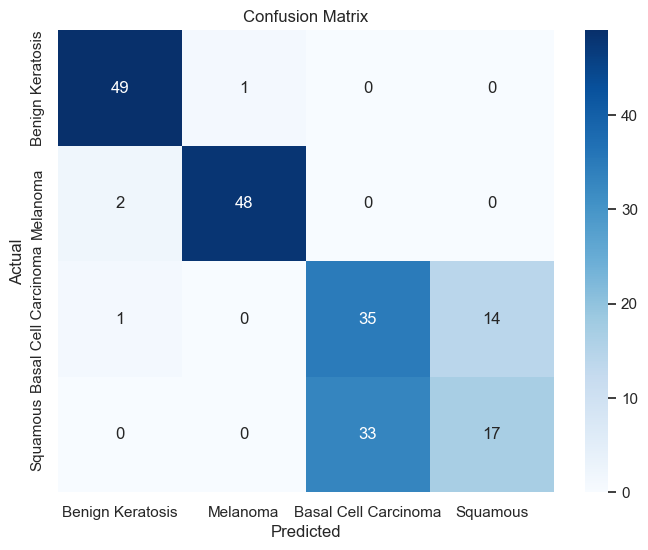

                      precision    recall  f1-score   support

    Benign Keratosis       0.94      0.98      0.96        50
            Melanoma       0.98      0.96      0.97        50
Basal Cell Carcinoma       0.51      0.70      0.59        50
            Squamous       0.55      0.34      0.42        50

            accuracy                           0.74       200
           macro avg       0.75      0.74      0.74       200
        weighted avg       0.75      0.74      0.74       200



In [55]:
# Make predictions on the test dataset
predicted_probs = skincancermodel.predict(x_valid, batch_size=16, verbose=0)

# Calculate the confusion matrix using probabilities
confusion_mtx = confusion_matrix(np.argmax(y_valid, axis=1), np.argmax(predicted_probs, axis=1))

# Define class labels
class_labels = ['Benign Keratosis', 'Melanoma', 'Basal Cell Carcinoma', 'Squamous']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report with probabilities
report = classification_report(np.argmax(y_valid, axis=1), np.argmax(predicted_probs, axis=1), target_names=class_labels)
print(report)